In [1]:
import uproot
import awkward as ak
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import os, glob
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
from matplotlib.colors import LinearSegmentedColormap
# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-yaawta0k because the default path (/uscms/home/bbbam/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# ls -lhtr ../analysis/gen_information_A_2Tau/CMSSW_10_6_20/src/Gen

In [2]:

file = uproot.open("../analysis/gen_information_A_2Tau/CMSSW_10_6_20/src/Gen/genInfo_only_A_2Tau_dR0p4_train_dataset_unphysical.root")
RHTree = file["fevt/RHTree"]
# RHTree.keys()

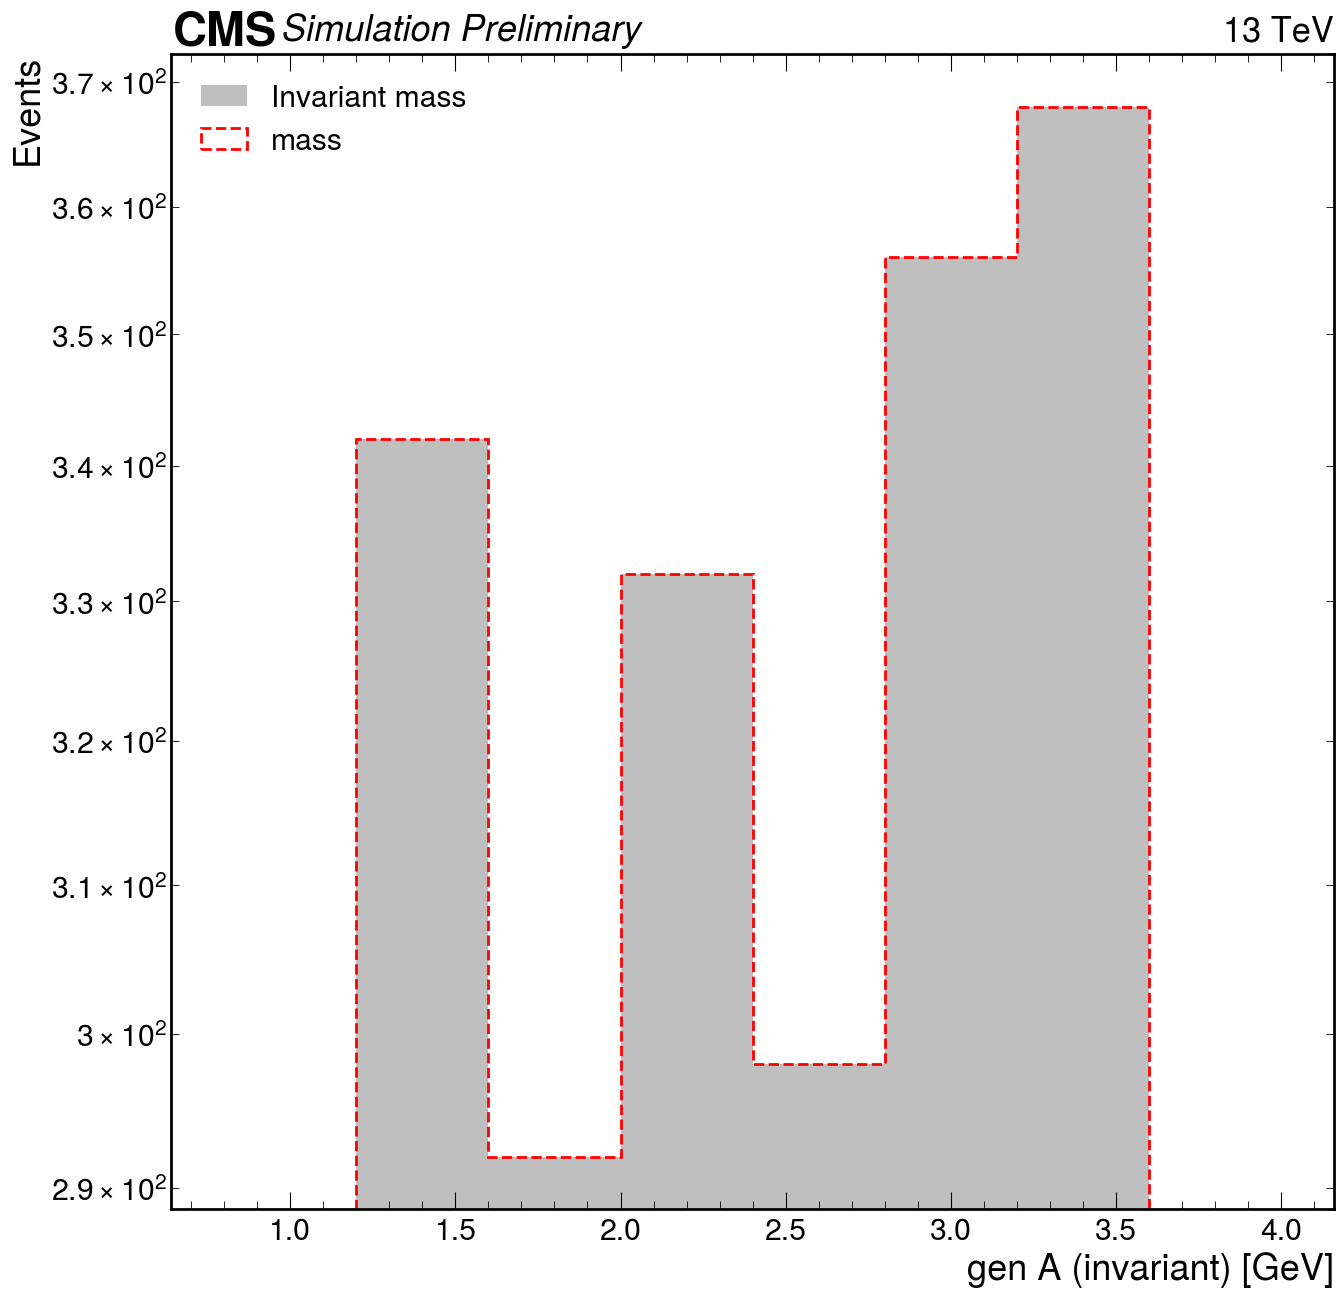

In [3]:
GenA1_invariant = RHTree.arrays(["GenA1_inv"],"GenA1_inv > -111",library="pd")['GenA1_inv']
GenA1 = RHTree.arrays(["GenA1"],"GenA1 > -111",library="pd")['GenA1']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(GenA1_invariant,bins=np.arange(0.8,4.4,0.4),color='grey',alpha=0.5,label="Invariant mass",density =0,log=1)
plt.hist(GenA1,bins=np.arange(0.8,4.4,0.4),histtype='step',linestyle='--',linewidth=2, color='red',label="mass",density=0,log=1)
# plt.xticks(np.arange(3.6,17,0.8))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen A (invariant) [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/gen_A_mass_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

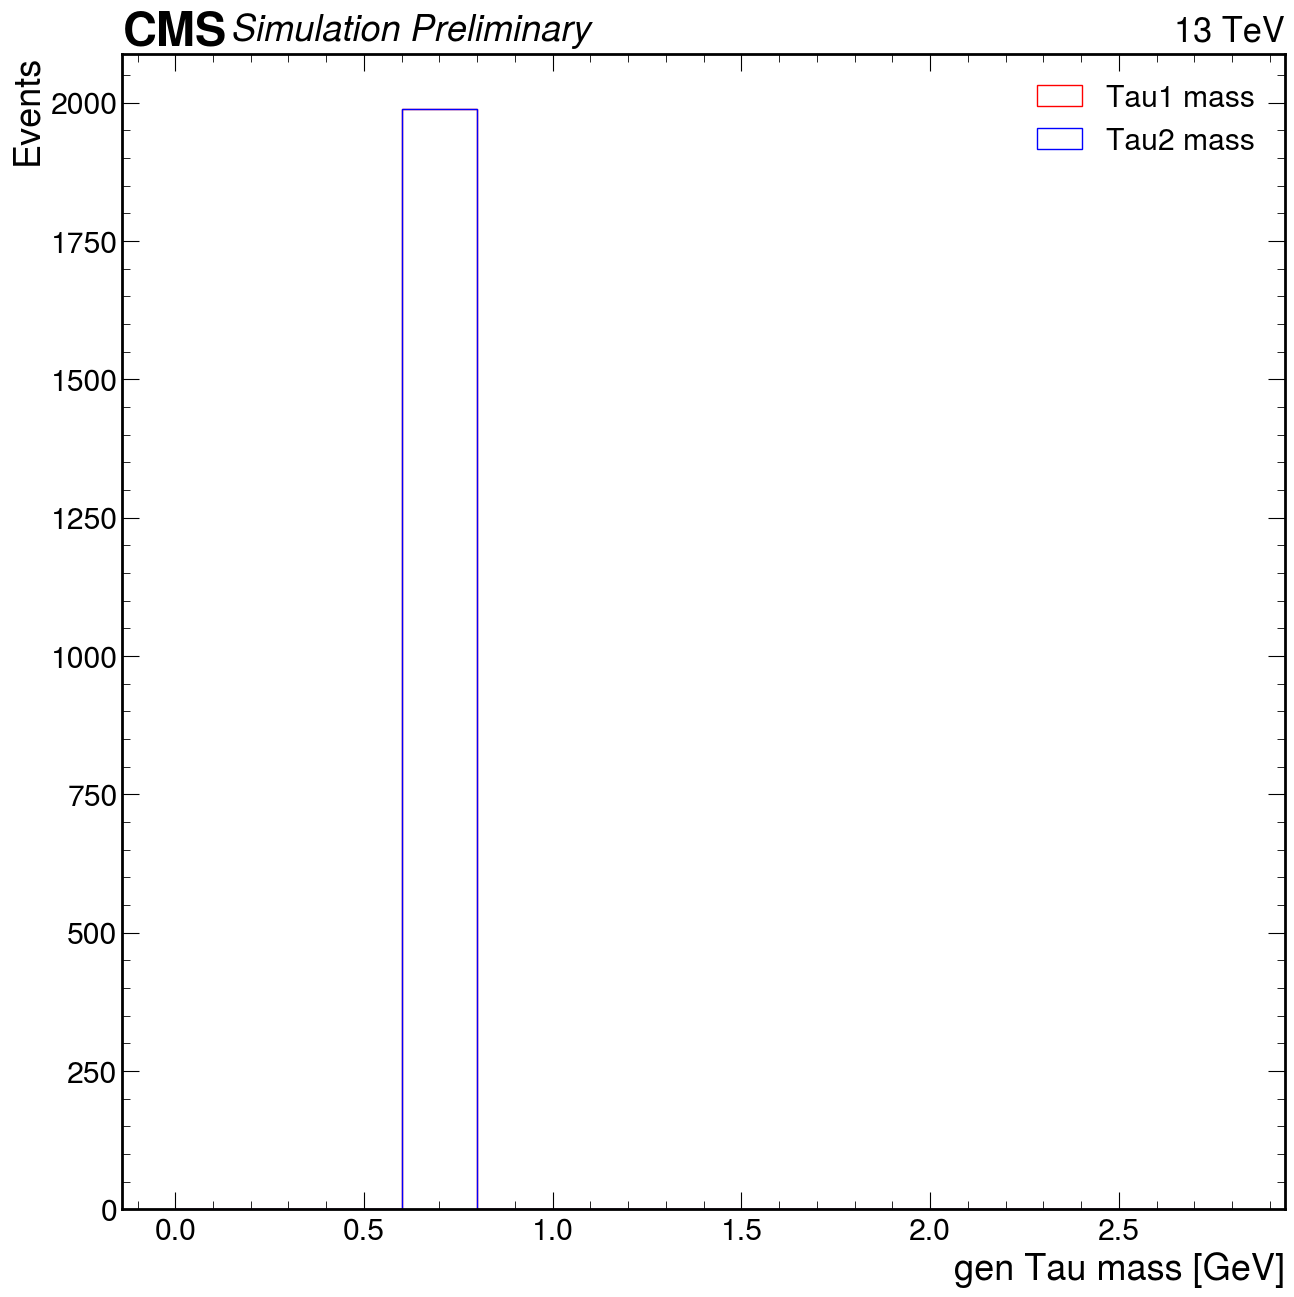

In [4]:
Tau1_mass = RHTree.arrays(["Tau1_mass"],"Tau1_mass > -111",library="pd")['Tau1_mass']
Tau2_mass = RHTree.arrays(["Tau2_mass"],"Tau2_mass > -111",library="pd")['Tau2_mass']

fig, ax = plt.subplots(figsize=(15,15))
plt.hist(Tau1_mass,bins=np.arange(0,3,.2),histtype='step', color='red',label="Tau1 mass")
plt.hist(Tau2_mass,bins=np.arange(0,3,.2),histtype='step', color='b',label="Tau2 mass")

# plt.xticks(np.arange(0,3,10))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen Tau mass [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/gen_Tau_pt_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

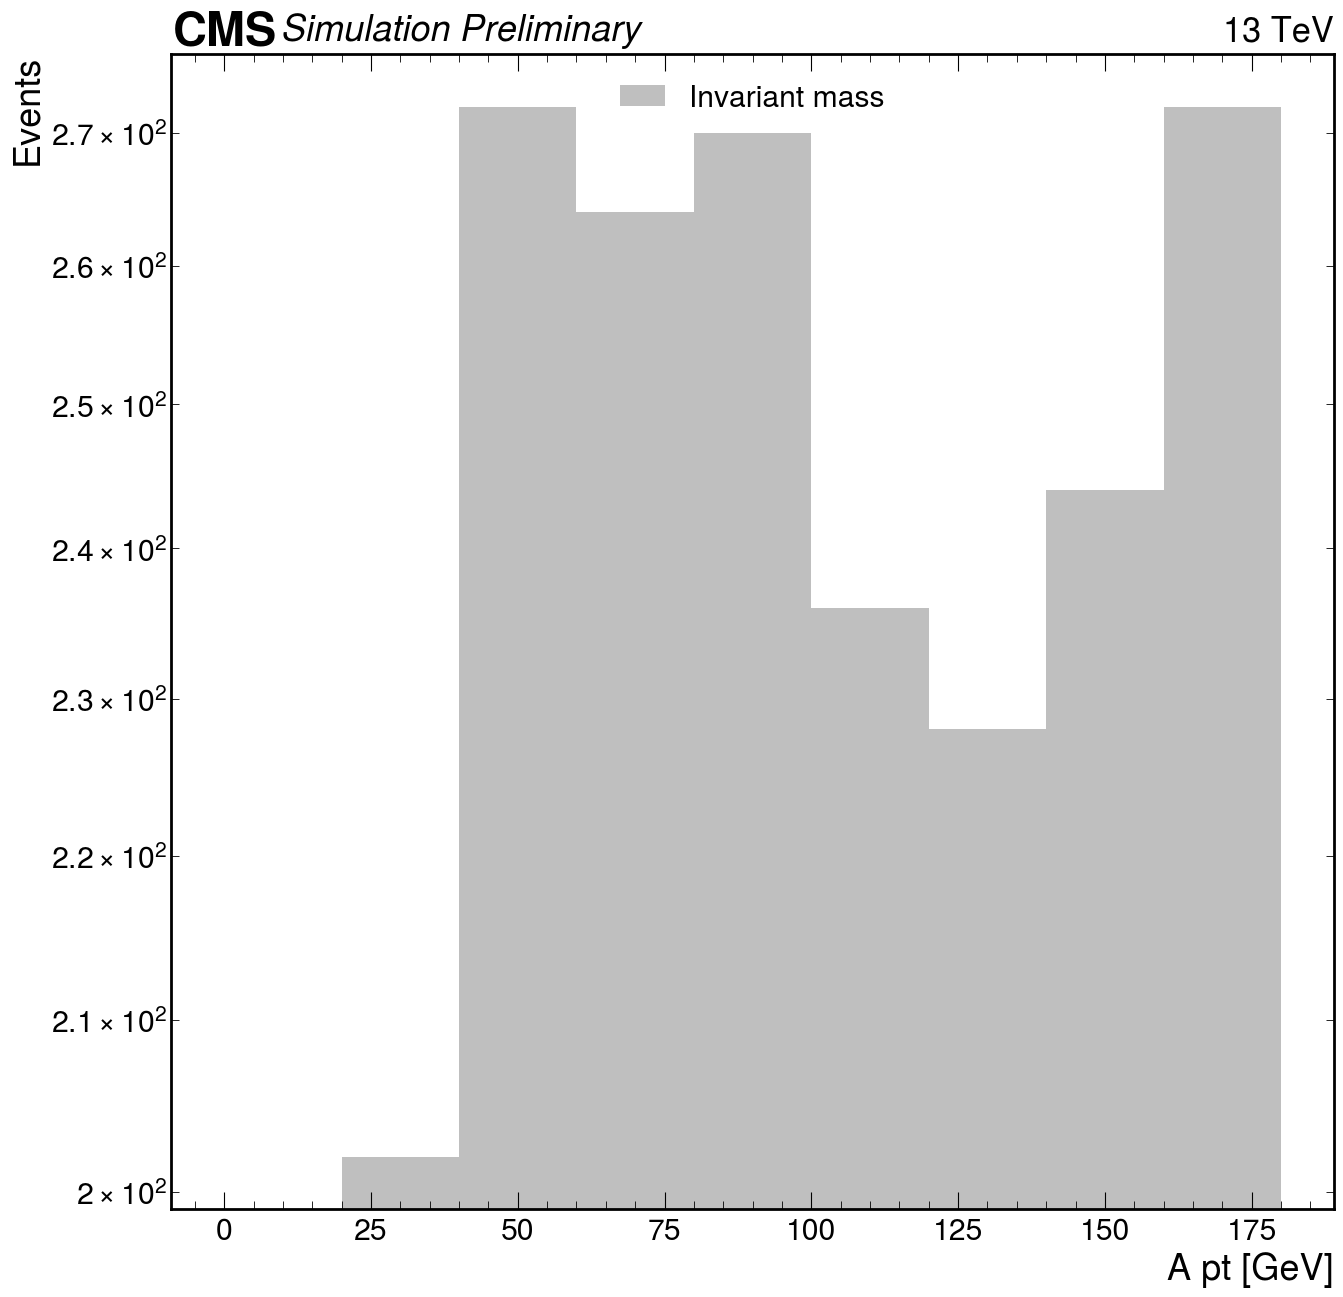

In [5]:
A1_pt = RHTree.arrays(["A1_pt"],"A1_pt > -111",library="pd")['A1_pt']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(A1_pt,bins=np.arange(0,200,20),color='grey',alpha=0.5,label="Invariant mass",density =0,log=1)
plt.legend()
plt.ylabel("Events")
plt.xlabel(" A pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/gen_A_mass_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

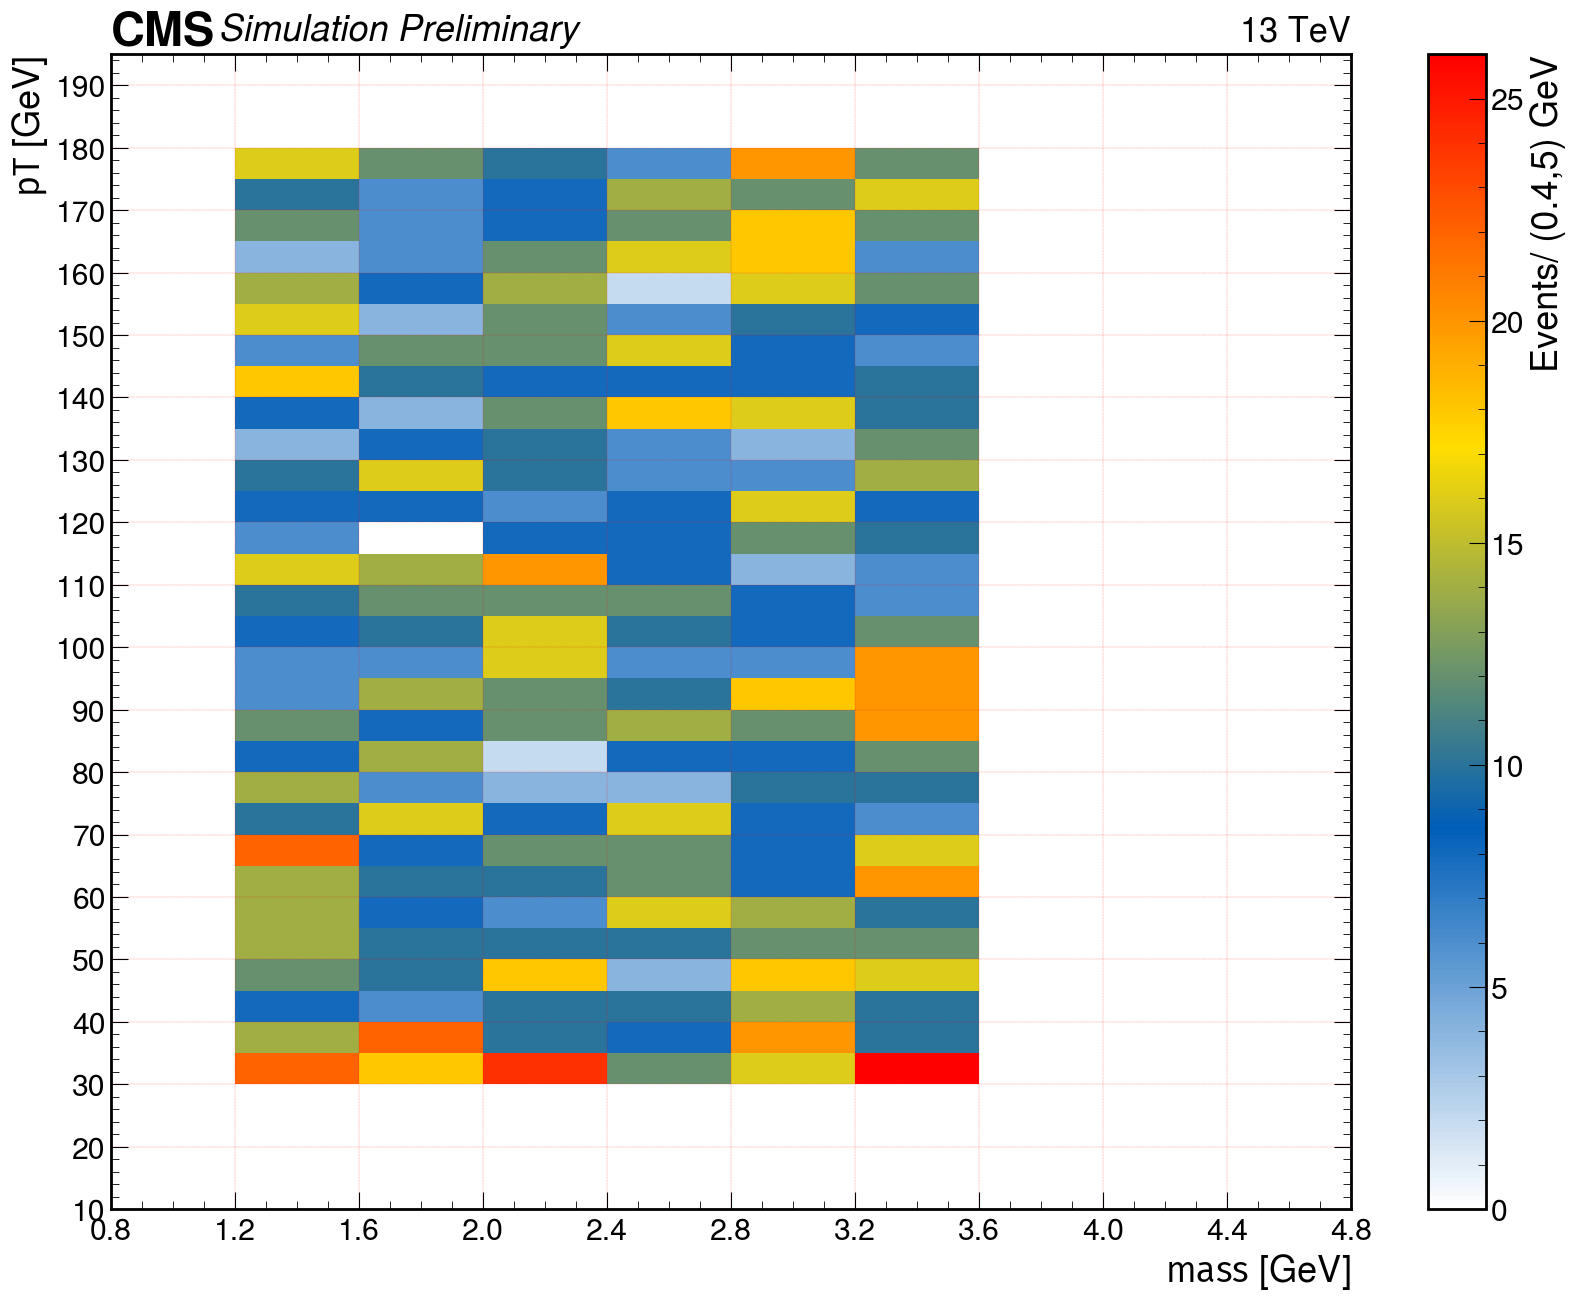

In [6]:
GenA1 = RHTree.arrays(["GenA1"],"GenA1 > -111",library="pd")['GenA1']
A1_pt = RHTree.arrays(["A1_pt"],"A1_pt > -111",library="pd")['A1_pt']
mass_bins =np.arange(0.8, 5, .4)
pt_bins = np.arange(30,200,5)
fig, ax = plt.subplots(figsize=(20,15))
# norm = mcolors.TwoSlopeNorm(vmin=5000, vmax = 7000, vcenter=5500)
plt.hist2d(GenA1, A1_pt, bins=[mass_bins, pt_bins],cmap=cms_cmap)
plt.xticks(np.arange(0.8, 5, .4))
plt.yticks(np.arange(10,200,10))
plt.xlabel(r'$\mathrm{mass}$ [GeV]')
plt.ylabel(r'$\mathrm{pT}$ [GeV]')
plt.colorbar().set_label(label='Events/ (0.4,5) GeV')
plt.grid(color='r', linestyle='--', linewidth=.2)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)


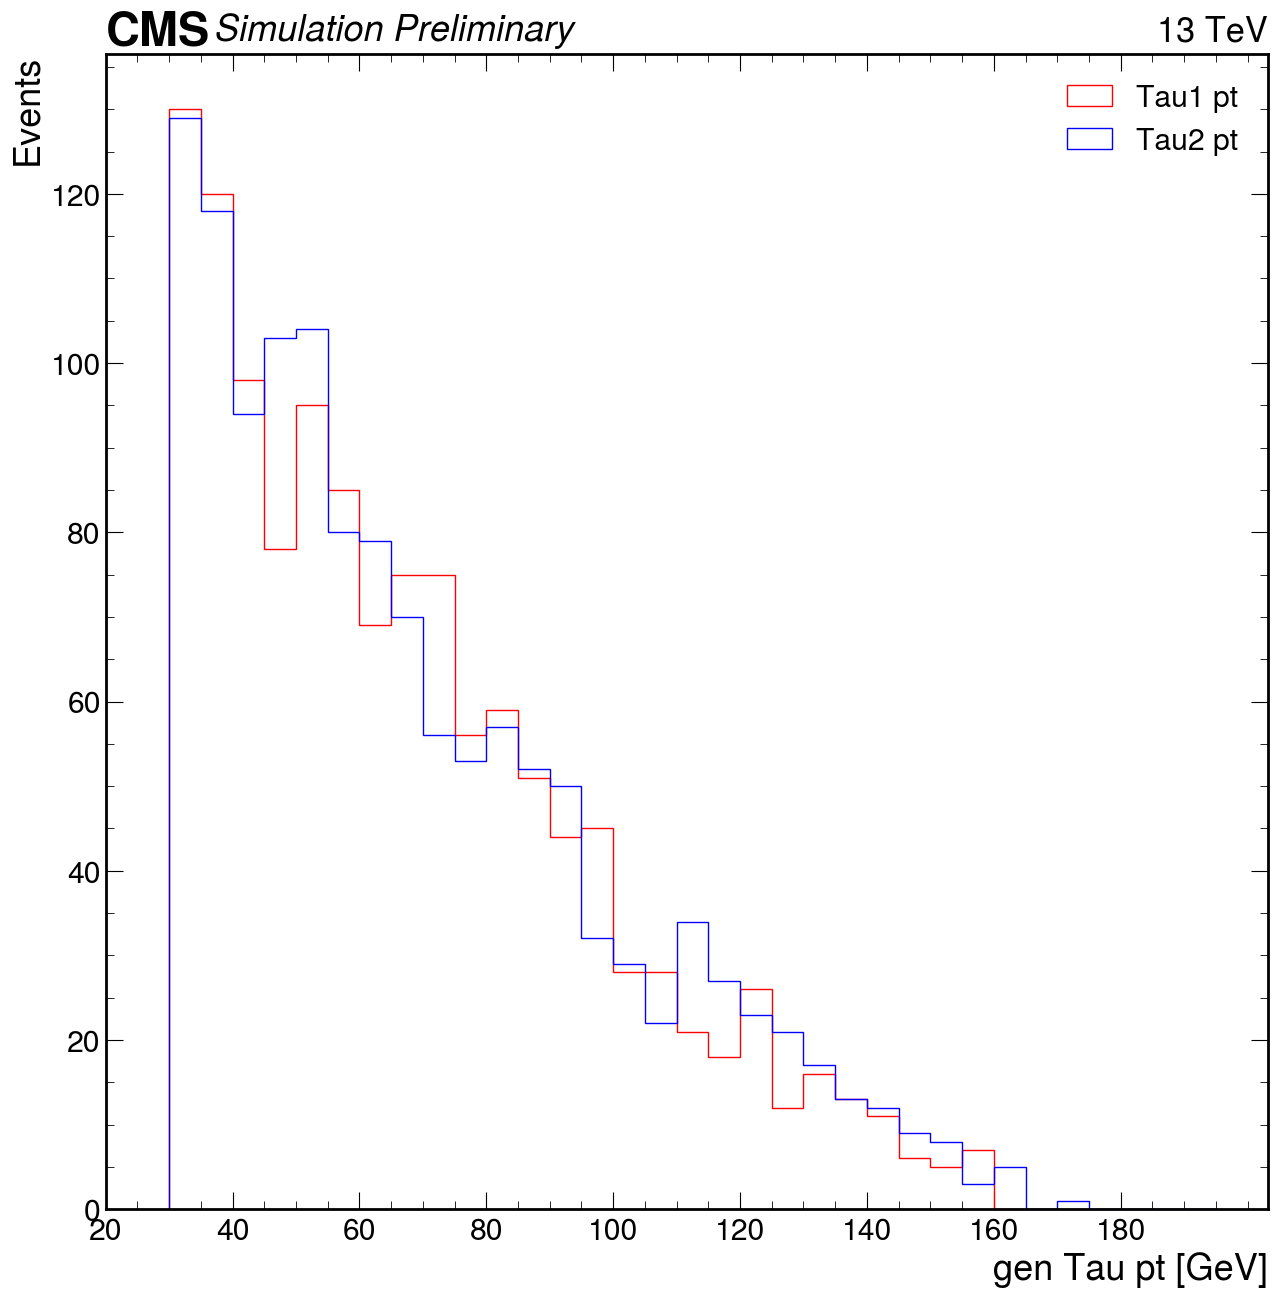

In [7]:
Tau1_pt = RHTree.arrays(["Tau1_pt"],"Tau1_pt > -111",library="pd")['Tau1_pt']
Tau2_pt = RHTree.arrays(["Tau2_pt"],"Tau2_pt > -111",library="pd")['Tau2_pt']

fig, ax = plt.subplots(figsize=(15,15))
plt.hist(Tau1_pt,bins=np.arange(30,200,5),histtype='step', color='red',label="Tau1 pt")
plt.hist(Tau2_pt,bins=np.arange(30,200,5),histtype='step', color='b',label="Tau2 pt")

plt.xticks(np.arange(20,200,20))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen Tau pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/gen_Tau_pt_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

In [39]:
file = uproot.open("../analysis/gen_information_A_2Tau/CMSSW_10_6_20/src/Gen/genInfo_only_A_2Tau_dR0p4_train_dataset.root")
RHTree = file["fevt/RHTree"]
# RHTree.keys()


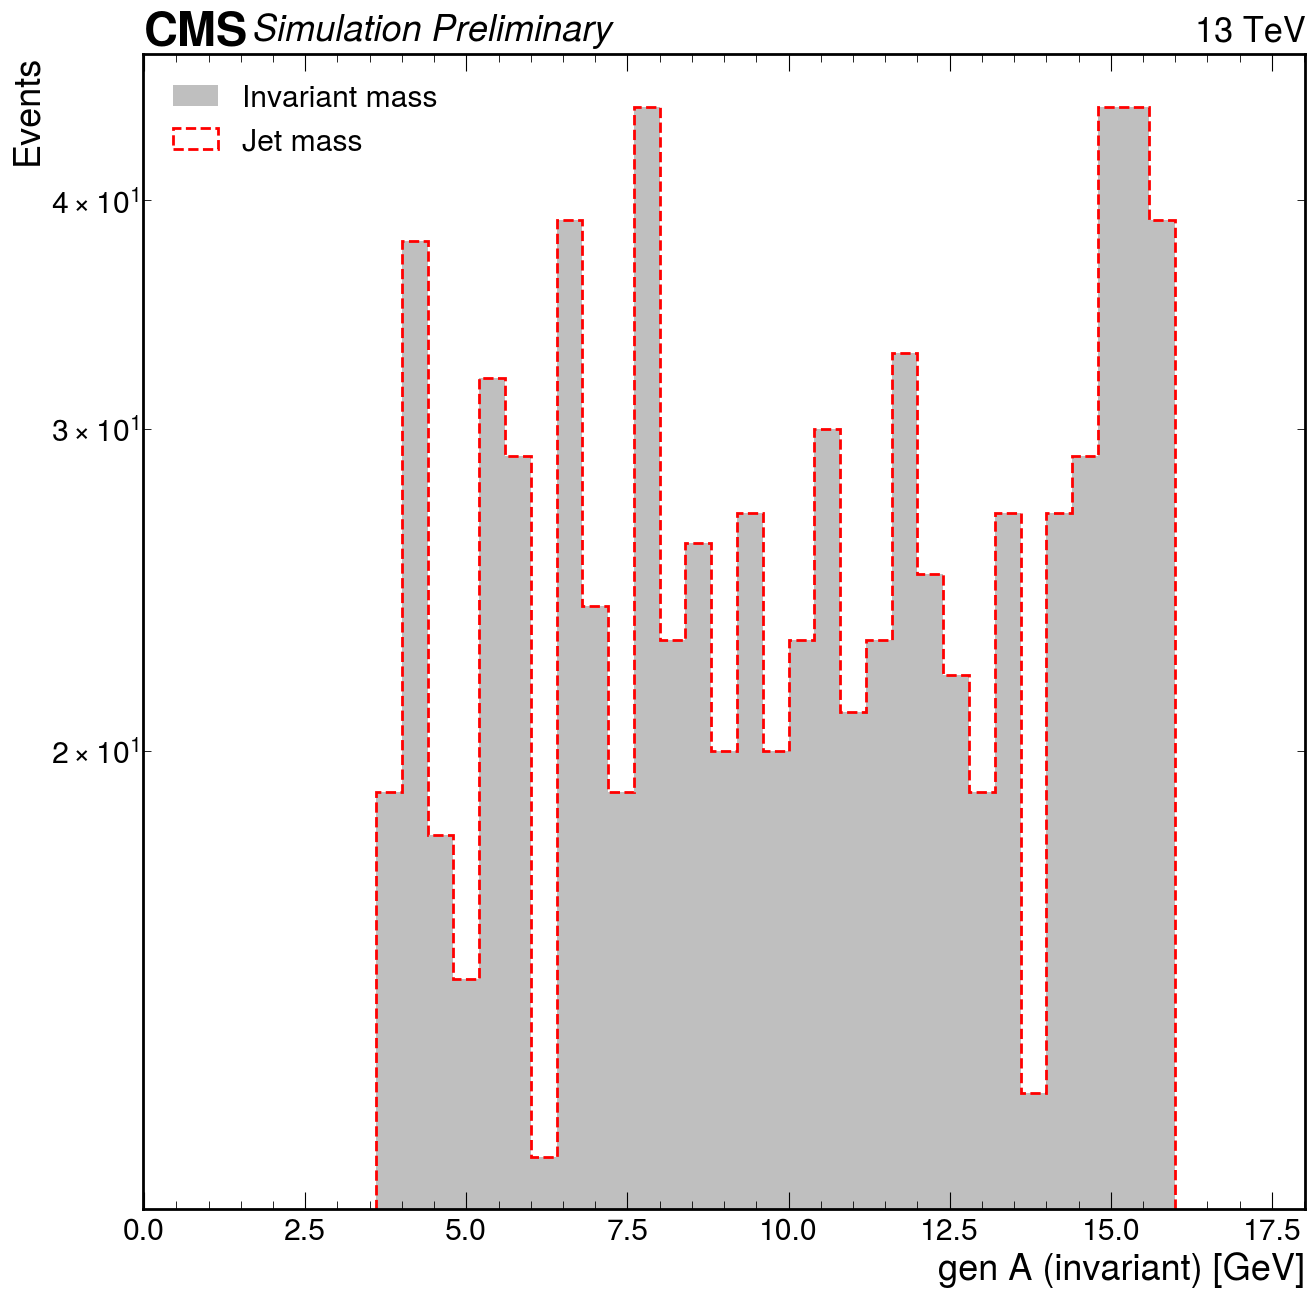

In [40]:
GenA1_invariant = RHTree.arrays(["GenA1_inv"],"GenA1_inv > -111",library="pd")['GenA1_inv']
GenA1 = RHTree.arrays(["GenA1"],"GenA1 > -111",library="pd")['GenA1']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(GenA1_invariant,bins=np.arange(0.8,17.4,0.4),color='grey',alpha=0.5,label="Invariant mass",density =0,log=1)
plt.hist(GenA1,bins=np.arange(0.8,17.4,0.4),histtype='step',linestyle='--',linewidth=2, color='red',label="Jet mass",density=0,log=1)
# plt.xticks(np.arange(3.6,17,0.8))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen A (invariant) [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/gen_A_mass_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

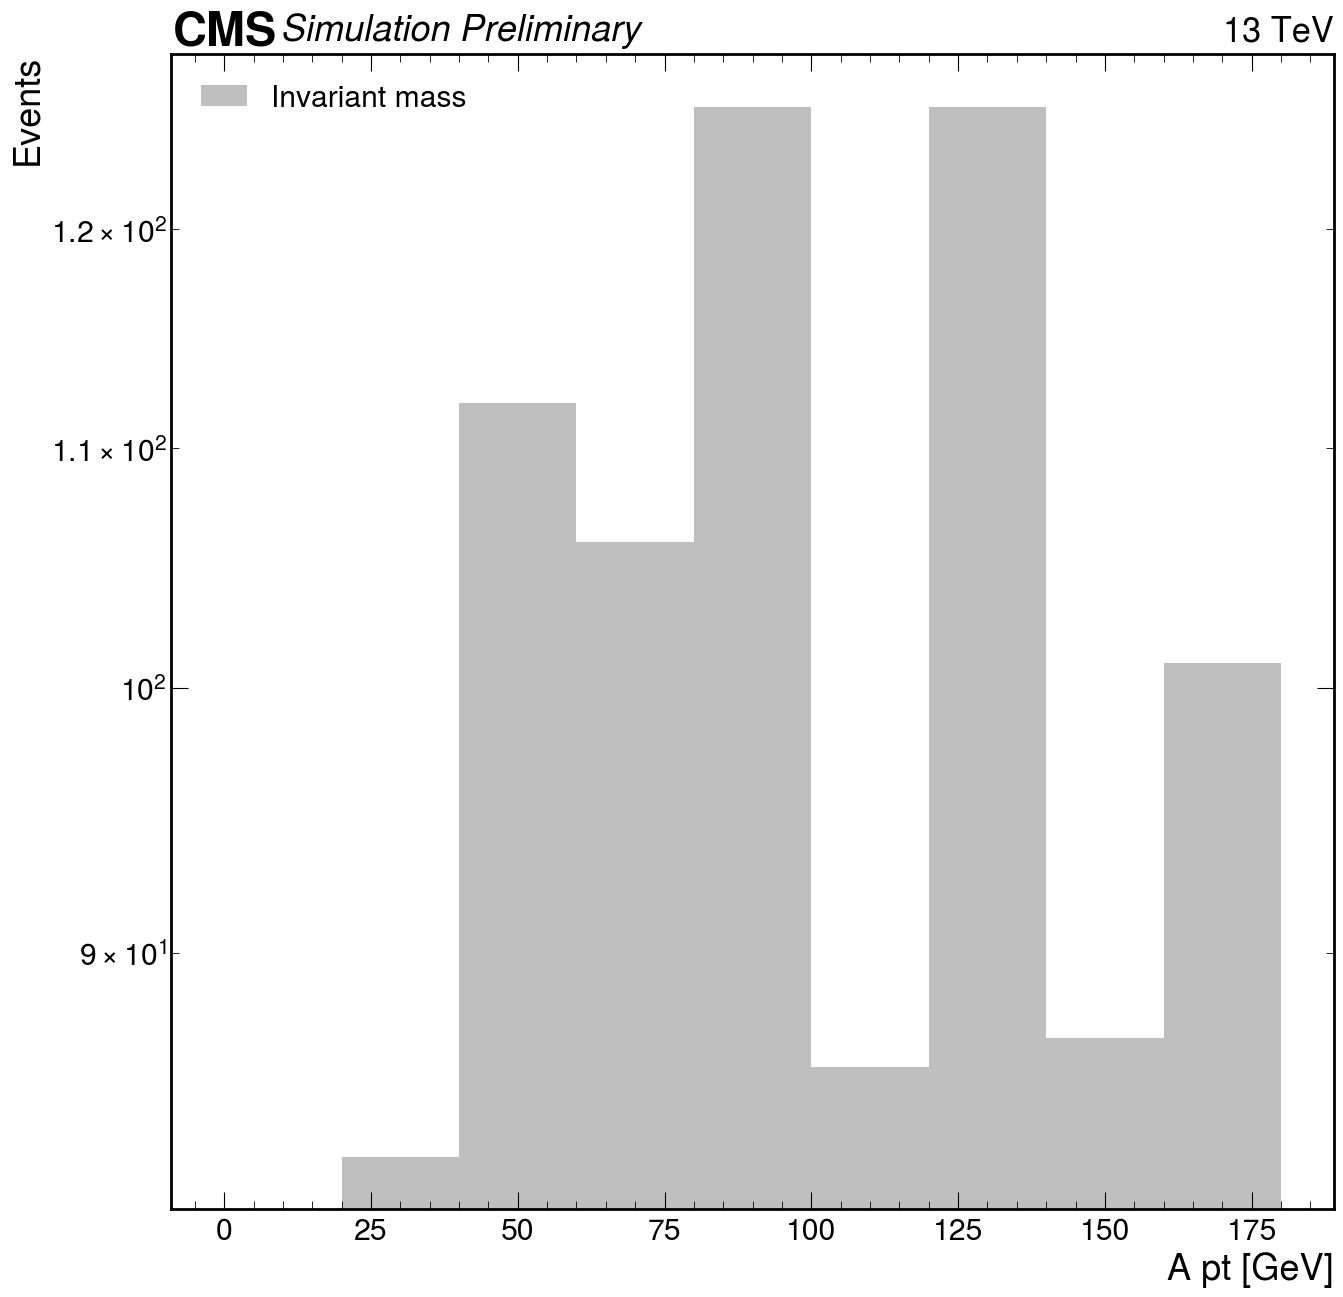

In [41]:
A1_pt = RHTree.arrays(["A1_pt"],"A1_pt > -111",library="pd")['A1_pt']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(A1_pt,bins=np.arange(0,200,20),color='grey',alpha=0.5,label="Invariant mass",density =0,log=1)
plt.legend()
plt.ylabel("Events")
plt.xlabel(" A pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/gen_A_mass_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

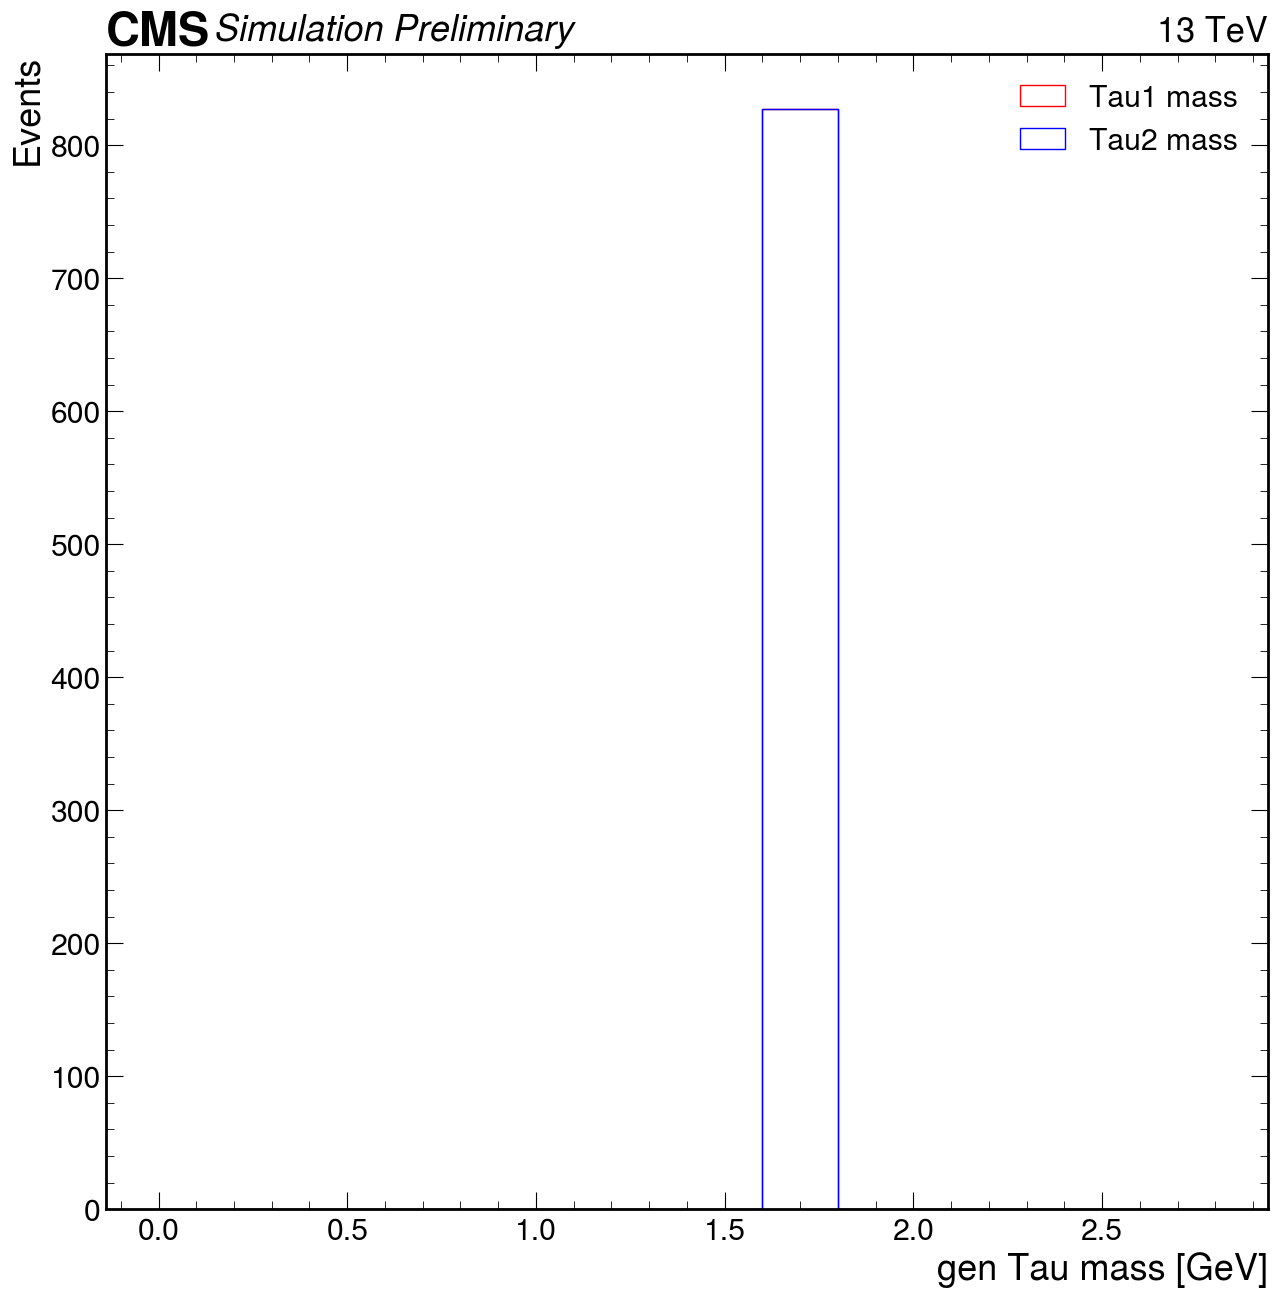

In [42]:
Tau1_mass = RHTree.arrays(["Tau1_mass"],"Tau1_mass > -111",library="pd")['Tau1_mass']
Tau2_mass = RHTree.arrays(["Tau2_mass"],"Tau2_mass > -111",library="pd")['Tau2_mass']

fig, ax = plt.subplots(figsize=(15,15))
plt.hist(Tau1_mass,bins=np.arange(0,3,.2),histtype='step', color='red',label="Tau1 mass")
plt.hist(Tau2_mass,bins=np.arange(0,3,.2),histtype='step', color='b',label="Tau2 mass")

# plt.xticks(np.arange(0,3,10))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen Tau mass [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/gen_Tau_pt_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

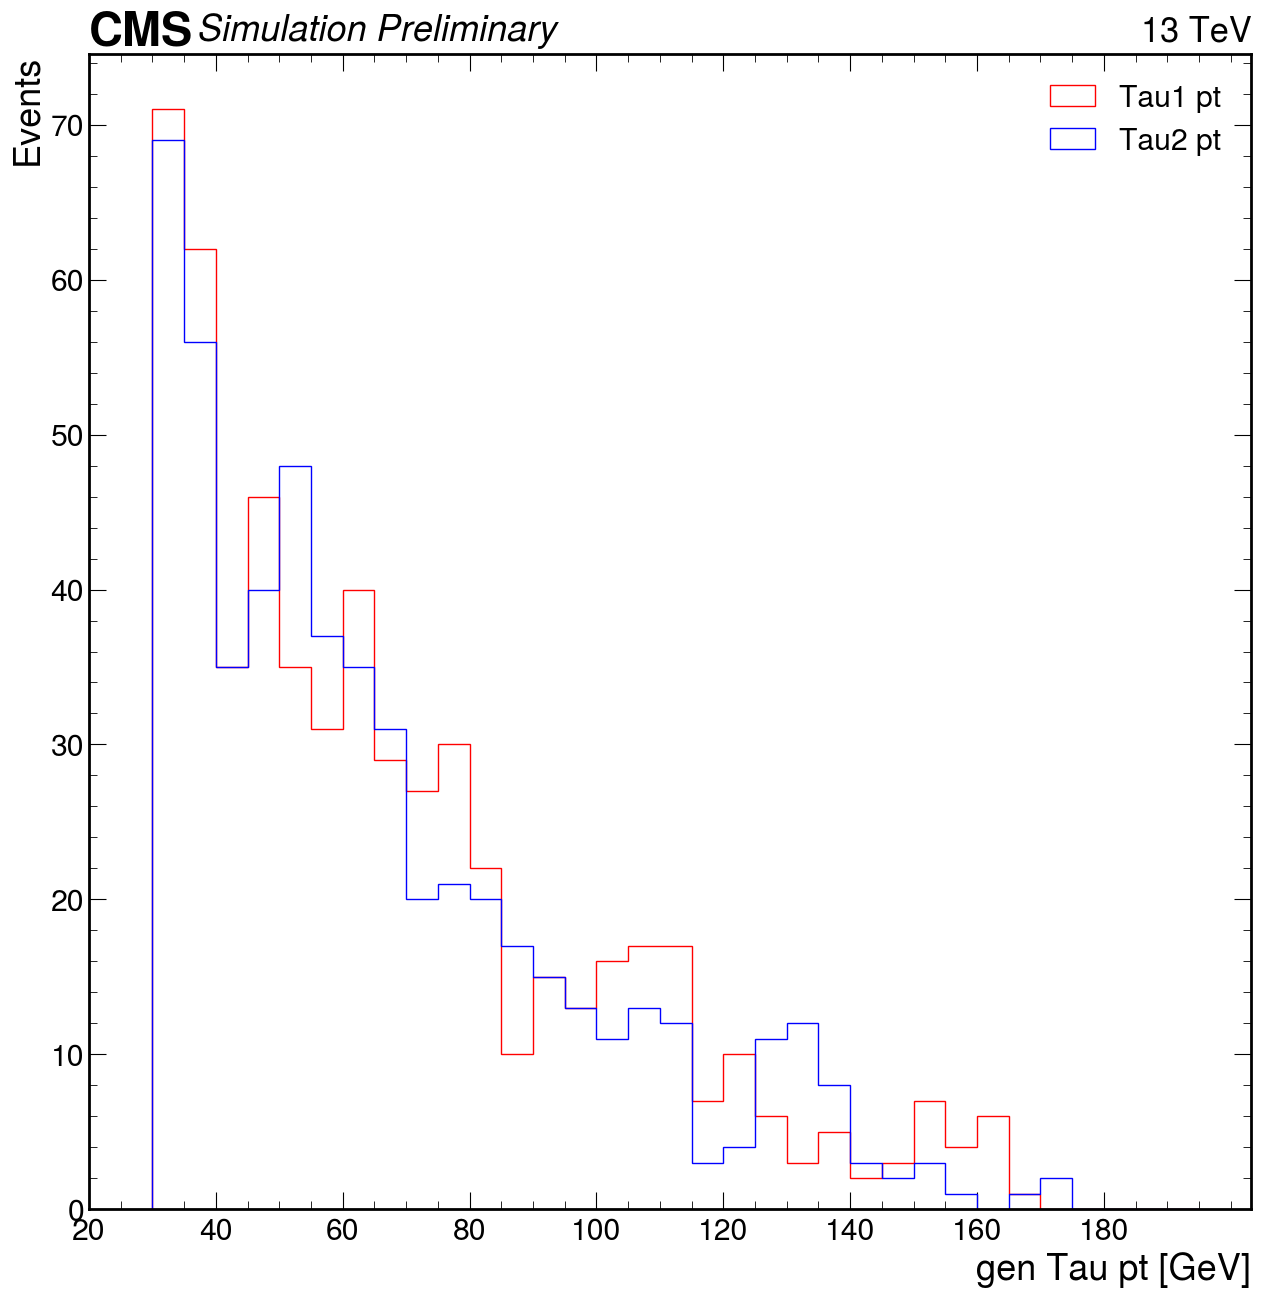

In [43]:
Tau1_pt = RHTree.arrays(["Tau1_pt"],"Tau1_pt > -111",library="pd")['Tau1_pt']
Tau2_pt = RHTree.arrays(["Tau2_pt"],"Tau2_pt > -111",library="pd")['Tau2_pt']

fig, ax = plt.subplots(figsize=(15,15))
plt.hist(Tau1_pt,bins=np.arange(30,200,5),histtype='step', color='red',label="Tau1 pt")
plt.hist(Tau2_pt,bins=np.arange(30,200,5),histtype='step', color='b',label="Tau2 pt")

plt.xticks(np.arange(20,200,20))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen Tau pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/gen_Tau_pt_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

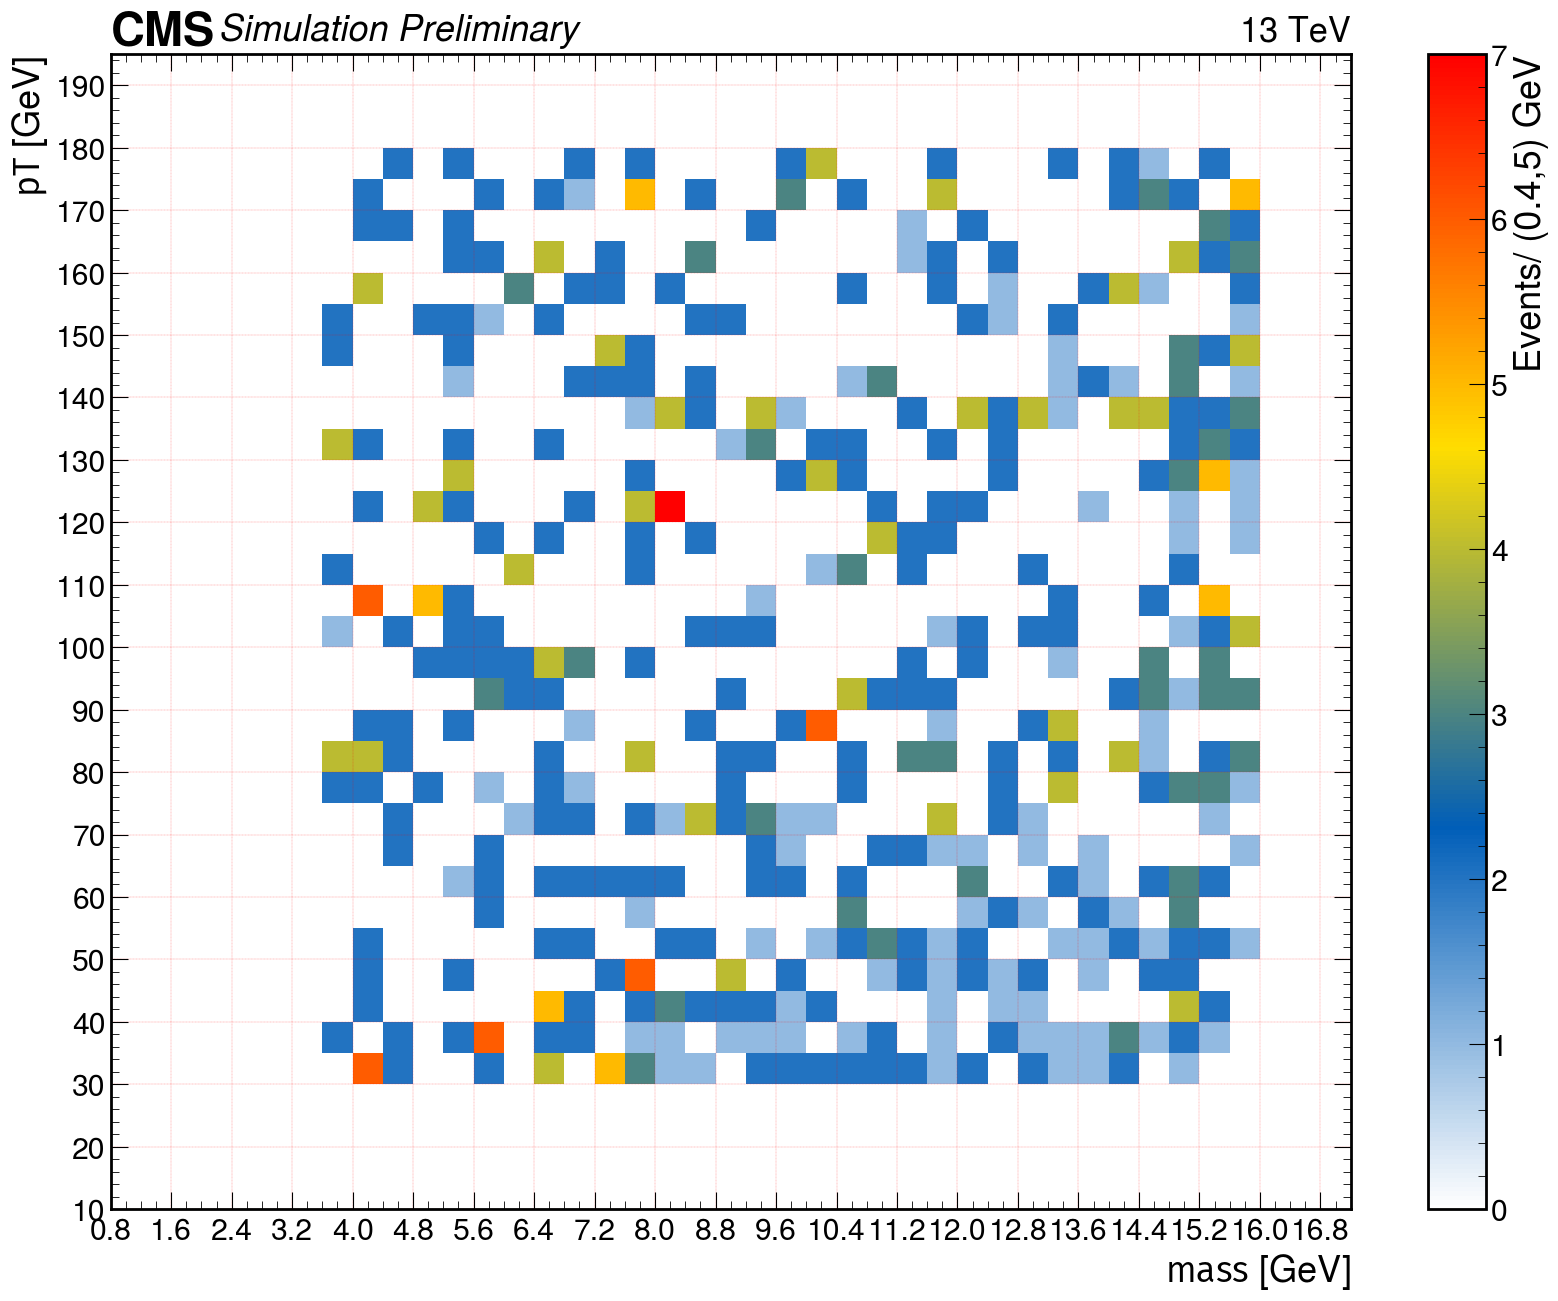

In [44]:
GenA1 = RHTree.arrays(["GenA1"],"GenA1 > -111",library="pd")['GenA1']
A1_pt = RHTree.arrays(["A1_pt"],"A1_pt > -111",library="pd")['A1_pt']
mass_bins =np.arange(0.8, 17.4, .4)
pt_bins = np.arange(30,200,5)
fig, ax = plt.subplots(figsize=(20,15))
# norm = mcolors.TwoSlopeNorm(vmin=5000, vmax = 7000, vcenter=5500)
plt.hist2d(GenA1, A1_pt, bins=[mass_bins, pt_bins],cmap=cms_cmap)
plt.xticks(np.arange(0.8, 17.4, .8))
plt.yticks(np.arange(10,200,10))
plt.xlabel(r'$\mathrm{mass}$ [GeV]')
plt.ylabel(r'$\mathrm{pT}$ [GeV]')
plt.colorbar().set_label(label='Events/ (0.4,5) GeV')
plt.grid(color='r', linestyle='--', linewidth=.2)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)